# **Number Detection**

# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv
import numpy as np
import collections
import tensorflow as tf
import seaborn as sns
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# Import Dataset

In [2]:
digits = datasets.load_digits()

# Find Contours for Entire Digits

In [4]:
moments_list = []
for image in digits.images:
    digit_unint8 = cv.convertScaleAbs(image, alpha=(255.0))
    _, thresh = cv.threshold(digit_unint8, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    counters, hierarchy = cv.findContours(thresh, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)

    digit_moments = []
    for counter in counters:
        moments = cv.moments(counter)
        digit_moments.extend(list(moments.values()))

    moments_list.append(digit_moments)

# Padding the Contours Set

In [5]:
max_len = max(len(row) for row in moments_list)


# Padding shorter lists of moments with zeros to ensure uniform length
moment_pad = [row + [0] * (max_len - len(row)) for row in moments_list]

moment_pad_array = np.array(moment_pad)

# Flatten Moments

In [6]:
# Flatten the list of moments
moments_array = np.array(moment_pad)
totalItems = moments_array.shape[1]

df_data = pd.DataFrame(moments_array)
df_data = df_data.astype('float32')

# Train the model

In [7]:
#split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(df_data, digits.target, test_size=0.2, shuffle=False)


# Define and compile the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(totalItems, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Train the model with the custom callback
model.fit(X_train, y_train, epochs=100)

# Evaluate the final model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/100
45/45 [==============================] - 2s 2ms/step - loss: 99.9969 - accuracy: 0.1642
Epoch 2/100
45/45 [==============================] - 0s 3ms/step - loss: 13.4021 - accuracy: 0.3994
Epoch 3/100
45/45 [==============================] - 0s 4ms/step - loss: 8.3534 - accuracy: 0.4349
Epoch 4/100
45/45 [==============================] - 0s 3ms/step - loss: 6.0509 - accuracy: 0.5031
Epoch 5/100
45/45 [==============================] - 0s 3ms/step - loss: 5.2001 - accuracy: 0.5289
Epoch 6/100
45/45 [==============================] - 0s 3ms/step - loss: 4.0672 - accuracy: 0.5797
Epoch 7/100
45/45 [==============================] - 0s 3ms/step - loss: 3.9806 - accuracy: 0.5804
Epoch 8/100
45/45 [==============================] - 0s 3ms/step - loss: 3.3229 - accuracy: 0.6054
Epoch 9/100
45/45 [==============================] - 0s 3ms/step - loss: 4.0109 - accuracy: 0.5922
Epoch 10/100
45/45 [==============================] - 0s 3ms/step - loss: 3.4983 - accuracy: 0.6180
Epoch 1

# Print Confusion Matrix

In [8]:
# Get model predictions
y_pred_probs = model.predict(X_test)

# Convert probabilities to predicted labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Display confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

12/12 [==============================] - 0s 2ms/step
Confusion Matrix:
[[30  0  0  0  1  1  3  0  0  0]
 [ 0 14  1  1  7  0  0  0 12  1]
 [ 0  0 30  5  0  0  0  0  0  0]
 [ 0  0 13 16  0  3  0  0  5  0]
 [ 1  1  0  0 32  0  0  2  1  0]
 [ 1  0  0  0  4 22  1  2  3  4]
 [ 0  2  1  1  2  0 26  0  1  4]
 [ 0  0  0  0  3  1  0 30  1  1]
 [ 0  1  3  2  0  3  0  2 16  6]
 [ 1  1  1  4  0  2  0  3  1 24]]


# Show Confusion Matrix

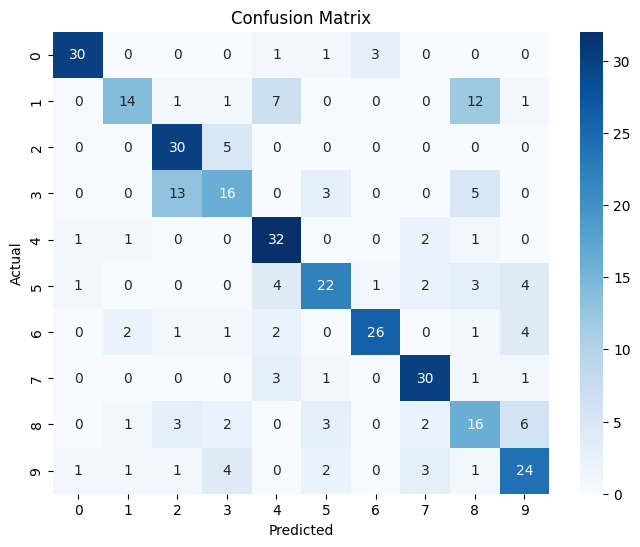

In [9]:
# Display confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()